**Nome: Eric Kauati Saito**

# Introdução

Um dos métodos não invasivos mais utilizados para identificação de padrões provenientes do córtex cerebral em aplicações de Interface Cérebro-Máquina (ICM) é a eletroencefalografia (EEG), sendo um dos motivos para tal a facilidade do seu uso e seu mais baixo custo em relação a outras tecnologias.

A imagética motora é uma técnica na qual o indivíduo tenta simular uma determinada ação sem uma resposta muscular. Tem sido bastante estudada a sua utilização em conjunto com ICMs, devido a sua utilização para reabilitação. Podendo ser uma maneira de treinar os usuários a ter controle da ICM, ou para ajudar na reabilitação


# Objetivo
Identificar a imaginação da flexão e extensão do cotovelo a partir de sinais de eletroencefalografia. 

# Materiais e Métodos

## Dados
Esse trabalho utilizou os dados de Lana et al [1], que contém o registro de sinais de EEG de seis participantes destros e sadios. O registro foi feito utilizando uma touca com dezessete eletrodos (F7, F3, Fz, F4, F8, C3, Cz, C4, T3, T4, T5, P3, Pz, P4, T6, O1 e O2), posicionados de acordo com o sistema 10-20, referenciado aos lóbulos auriculares e o eletrodo de terra posicionado na testa do participante.  Os sinais registrados com uma frequência de amostragem de 600 Hz, com um filtro passa-faixa entre 0,1 e 100 Hz. O movimento do manipulador robótico foi registrado junto com os sinais de EEG utilizando um acelerômetro

Os voluntários foram instruídos a imaginar a movimentação de flexão e extensão do cotovelo, acompanhando o tempo de movimentação do manipulador robótico (2,5 segundos), mantendo o braço imóvel. Entre as atividades de imaginação tem um intervalo aleatório de repouso de oito a doze segundos. 


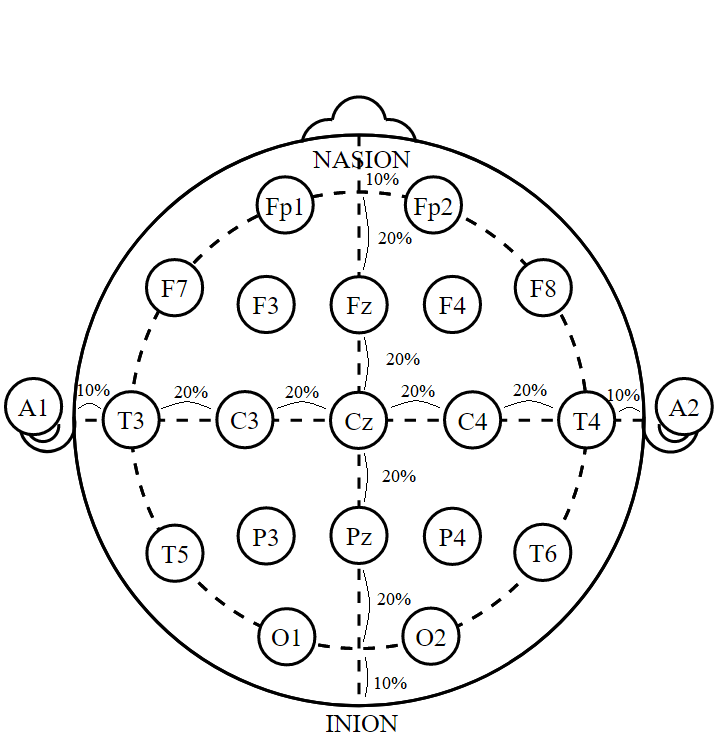

In [1]:
%matplotlib inline
from IPython.display import Image
Image('10-20.png')

\textbf{Figura 1: Sistema 10-20 de posicionamento dos eletrodos}

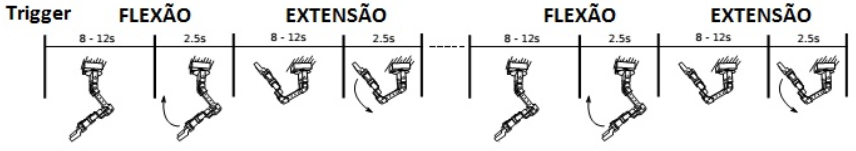

In [16]:
Image('tarefa-old.png')

\textbf{Figura 2: Sequência de movimentos realizados pelo manipulador robótico durante a tarefa}

## Pré-processamento

No pré-processamento dos sinais de EEG, foram utilizados filtros digitais com finalidade de atenuar os ruídos. 
Nessa etapa também foi feita a segmentação dos sinais de EEG utilizando os sinais de acelerômetro como indicador de começo e final da atividade da imaginação.

### Detecção do início da atividade utilizando o sinal do acelerômetro

Para a detecção do início da ativiidade utilizando o sinal do acelerômetro foi utilizado filtros digitais para atenuar os ruídos de alta frequência.

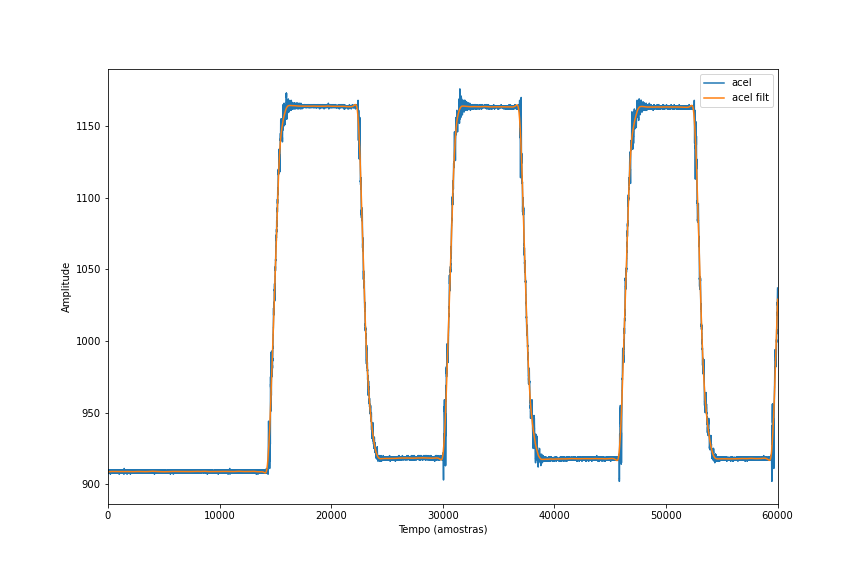

In [2]:
Image('acc_comparacao.png')

\textbf{Figura 3: Sinal do acelerômetro filtrado e não filtrado}

Para detectar o inicio da atividade foi utilizado a derivada do sinal. Apresentado na Figura 4.

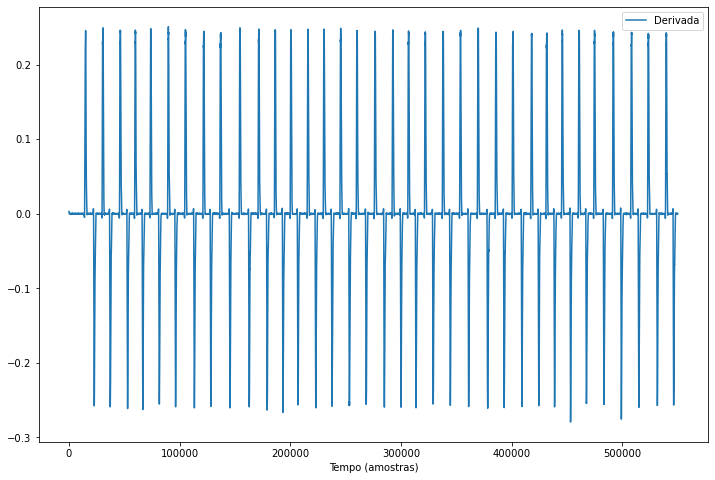

In [8]:
Image('acc_derivada.png')

\textbf{Figura 4: Derivada do sinal do acelerômetro}

Na detecção do pico as vezes foi visto necessário a retirada do primeiro ponto, uma vez que em alguns casos, o movimento do manipulador robótico era muito próximo do início do registro do sinal de EEG. Para essa decisão foi necessária uma visualização individual de cada atividade.
A Figura 5 mostra o resultado da detecção dos picos, sendo os picos positivos a atividade de flexão e os picos negativos a extensão.

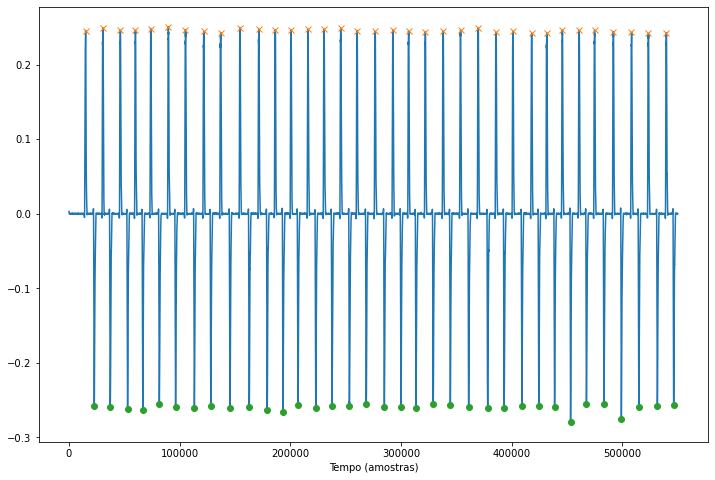

In [9]:
Image('findpeaks.png')

\textbf{Figura 5: Detecção de picos no sinal do acelerômetro}

### Filtragem do sinal de EEG

A filtragem do sinal de EEG foi feita utilizando filtros digitais do tipo Butterworth de quarta ordem e fase-zero (direta e inversamente), um passa-alta de 1 Hz e um passa-baixa de 40 Hz . Não foi utilizado um filtro notch para rejeitar o artefato da rede elétrica de 60 Hz.

Na Figura 6 temos para comparação da filtragem no domínio do tempo o gráfico do sinal não filtrado e do sinal filtrado.

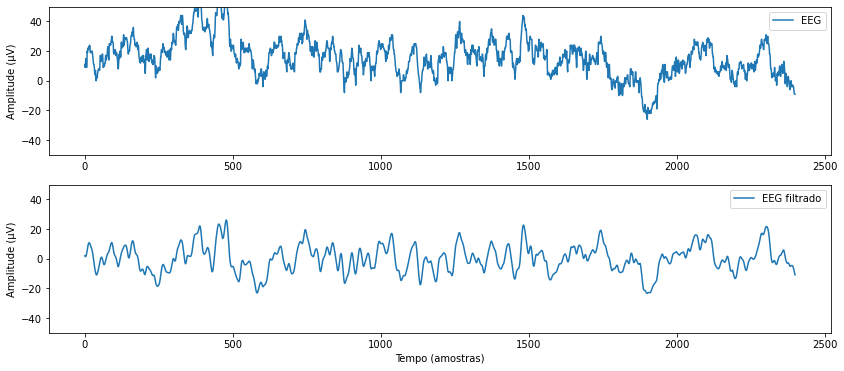

In [12]:
Image('sinal_comparacao.png')

\textbf{Figura 6: Exemplo para comparação do sinal de EEG filtrado e não filtrado}

Para comparação dos efeitos dos filtros no domínio da frequência, temos na Figura 7 o gráfico do espectro de amplitude unilateral do sinal não filtrado e na Figura 8 do sinal filtrado.

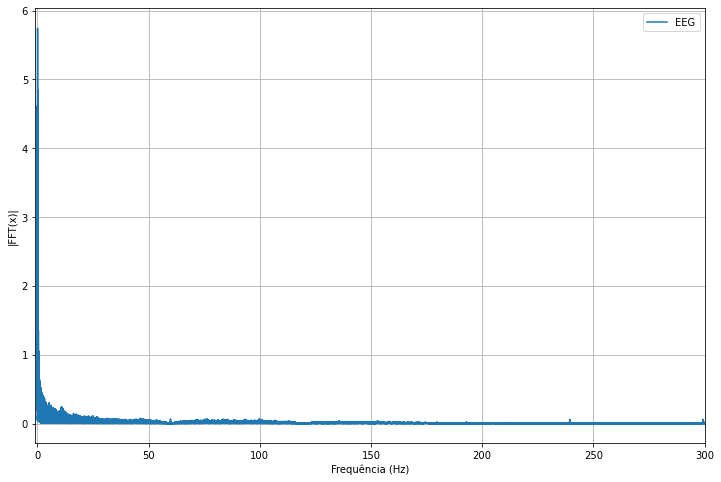

In [13]:
Image('fft_naofiltrado.png')

\textbf{Figura 7: Espectro de Amplitude Unilateral do sinal de EEG não filtrado}

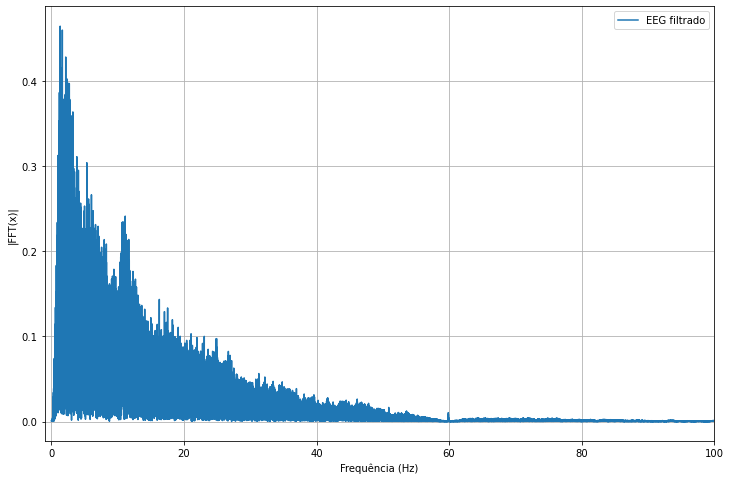

In [14]:
Image('fft_filtrado.png')

\textbf{Figura 8: Espectro de Amplitude Unilateral do sinal de EEG filtrado}

### Separação das épocas

Utilizando o acelerômetro como referência, foi feita a segmentação dos sinais de EEG. A segmentação foi feita a partir o início da atividade e 3 segundos após o início, totalizando em 4 segundos. No total, foram obtidas 767 observações.

## Extração de Características

Neste trabalho foi utilizada técnica de conectividade cerebral como extração de características. Técnicas que consideram a conectividade cerebral vem sendo estudadas, por se mostrarem úteis para a detecção de tarefas de IM.

### Conectividade Cerebral

A conectividade cerebral pode ser definida como a interação entre as estruturas cerebrais e como estas se relacionam durante tarefas motoras, sensoriais ou cognitivas. Neste trabalho, foi utilizada a coerência direcionada parcial generalizada (gPDC - generalized Partial Directed Coherence)[2]. Sendo um método formulado a partir do modelo multivariado autorregressivo de séries temporais. Esse método fornece o sentido da informação no domínio da frequência.

Na Figura 10 e 11 temos um exemplo de resultado dessa técnica. Na Figura 10 temos três séries temporais, sendo que a primeira influência na segunda, que por sua vez influência a terceira. Na Figura 11 temos o gráfico resultante da gPDC, no eixo X, a frequência em Hz e no eixo Y, os valores normalizados da gPDC, indicando o fluxo de informação. Nesse conjunto de gráficos as colunas representam as fontes e as linhas o destino do fluxo de informação. E na diagonal principal temos o auto espectro normalizado.

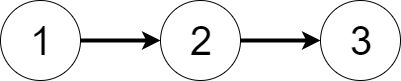

In [6]:
Image('3ch.png')

\textbf{Figura 9: Exemplo de três séries temporais e a influência entre elas}

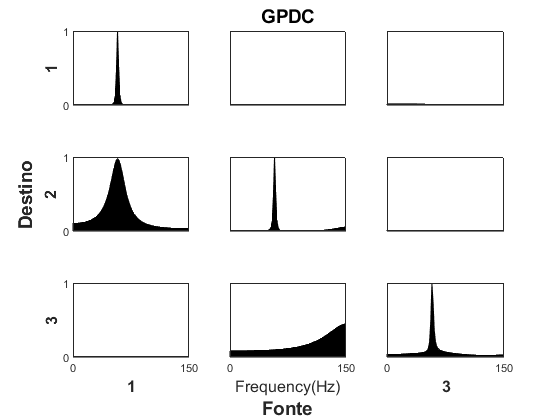

In [21]:
Image('GPDC_3ch.png')

\textbf{Figura 10: Gráfico da gPDC do exemplo mostrado na Figura 10}

Podemos ver na Figura 11 que a técnica utilizada como extração de características retorna muitos valores, dado o número total de observações (767) é inviável a utilização de todos esses valores. Por esse motivo, foram utilizadas algumas medidas (cinco) que poderiam representar esses resultados, como: média, desvio padrão, skewness, kurtosis e centróide.

Inicialmente, para simplificar, foram escolhidos apenas quatro canais do EEG: C3, C4, P3 e P4. Após observar os primeiros resultados foram escolhidos seis canais: C3, C4, P3, P4, F3 e F4. Esses canais foram escolhidos devido a sua distância com as áreas relacionadas ao movimento voluntário.

A Tabela 1 apresenta o *Dataframe* obtido da extração de características.

In [18]:
import pandas as pd
teste = pd.read_csv('Database_6canais.csv')
teste

,MeanF3F3,MeanF3C3,MeanF3P3,MeanF3F4,MeanF3C4,MeanF3P4,MeanC3F3,MeanC3C3,MeanC3P3,MeanC3F4,...,CentC4C4,CentC4P4,CentP4F3,CentP4C3,CentP4P3,CentP4F4,CentP4C4,CentP4P4,Movimento,Participante
0,0.774679,0.227786,0.155279,0.239602,0.213432,0.183366,0.242719,0.839261,0.245431,0.200031,...,22.979180,12.799078,17.831127,19.125638,18.712302,16.466834,12.411213,21.819455,0.0,1.0
1,0.688171,0.326415,0.307850,0.134349,0.103651,0.162497,0.400903,0.704492,0.240799,0.142449,...,22.913590,17.515210,18.003655,16.497349,12.893070,18.793071,16.035308,22.187108,0.0,1.0
2,0.766781,0.312438,0.157250,0.125762,0.220508,0.138342,0.367031,0.839582,0.152253,0.132477,...,22.797017,17.293012,16.746355,13.974383,16.119527,13.154422,14.902366,21.513003,0.0,1.0
3,0.816500,0.168452,0.187138,0.076890,0.143475,0.162553,0.252529,0.844402,0.143073,0.122577,...,24.530765,17.346849,18.106909,15.328928,15.827633,19.723689,16.859889,21.406019,0.0,1.0
4,0.736275,0.205363,0.223808,0.128565,0.063670,0.129945,0.293707,0.804148,0.146721,0.137973,...,22.796581,16.779483,18.977756,15.151427,12.151795,15.800895,15.405248,21.333232,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,0.914917,0.279013,0.188093,0.135529,0.163134,0.124980,0.076762,0.788679,0.196445,0.060647,...,22.394265,17.916055,12.013937,17.469638,18.681847,9.322145,19.249282,23.389398,1.0,6.0
763,0.908867,0.148201,0.156880,0.153978,0.194314,0.145313,0.061525,0.817285,0.212437,0.164695,...,22.078794,20.043014,10.825447,15.679458,17.774111,15.677062,19.582003,22.093718,1.0,6.0
764,0.887483,0.226497,0.228280,0.189499,0.178546,0.185479,0.046331,0.854208,0.234243,0.151578,...,21.979033,14.802226,15.692830,13.932990,18.392167,18.340409,20.393353,21.754042,1.0,6.0
765,0.921855,0.216028,0.113832,0.227195,0.203112,0.270625,0.122196,0.817628,0.219609,0.130558,...,21.532180,9.883099,15.430556,13.230535,19.239949,19.278986,18.712490,21.922264,1.0,6.0


\textbf{Tabela 1: Dataframe das caracteristicas obtidas}

## Análise exploratória dos dados
Nessa etapa foi feita uma tentativa de realizar uma análise exploratória dos dados utilizando box-plot e matriz de correlação. Devido ao grande número de características (180), inicialmente foi agrupado todas as características relacionadas as mesmas medidas. Ou seja, os canais foram agrupados de forma a termos apenas as medidas (média, desvio padrão, skewness, kurtosis e centróide).

A Tabela 2 apresenta esse novo *Dataframe* das características com os canais agrupados.

In [32]:
concatenado = pd.read_csv('concatenado_6canais.csv')
concatenado

,Media,Desvio Padrão,Skewness,Kurtosis,Centroide,Movimento
0,0.943157,0.064399,-1.618277,2.183512,20.963093,0.0
1,0.202882,0.156914,0.991855,0.826254,12.260166,0.0
2,0.148787,0.117540,1.179262,1.081500,13.679929,0.0
3,0.116139,0.103911,1.576903,1.939078,12.973504,0.0
4,0.067018,0.054457,0.876522,0.438201,13.018835,0.0
...,...,...,...,...,...,...
4819,0.237345,0.148217,0.164406,-1.323416,13.753003,1.0
4820,0.300179,0.164536,0.196829,-1.089740,17.349290,1.0
4821,0.237085,0.127176,0.638441,-0.719073,16.476744,1.0
4822,0.315989,0.086546,-1.174281,2.169774,19.989890,1.0


\textbf{Tabela 2: Dataframe para análise exploratória dos dados}

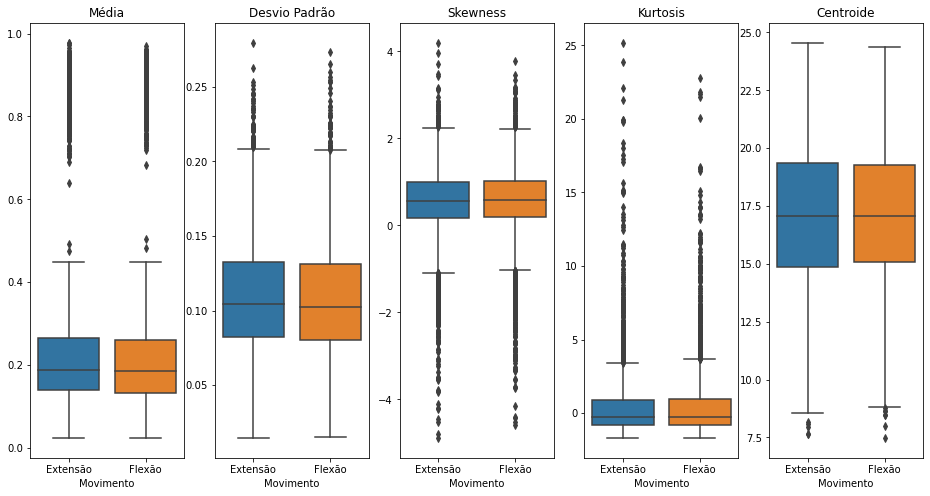

In [26]:
Image('boxplot.png')

\textbf{Figura 11: Boxplot das características agrupadas}

Os resultados apresentados no box plot (Figura 12) aparentemente não apresentam nenhuma diferença entre as classes.

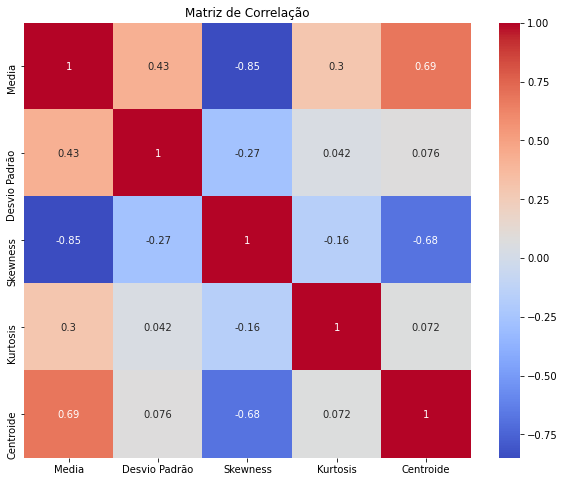

In [28]:
Image('matriz_correlacao.png')

\textbf{Figura 12: Matriz de correlação das características agrupadas}

Os resultados apresentados na matriz de correlação (Figura 13) mostra uma possível correlação inversa entre skewnewss e média. E pouca correlação entre as demais variáveis.

## Classificação

De forma a classificar as atividades de IM, flexão e extensão, foram utilizadas nesse trabalho alguns modelos. O primeiro foi a random forest e o segundo o KNN.

In [11]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import math
from sklearn.neighbors import KNeighborsClassifier

features_1 = pd.read_csv('Database_6canais.csv')

### Separação dos dados em treino e teste

Os dados foram separados para avaliação dos hiperparâmetros dos classificadores, para isso foi utilizando o método de holdout. Sendo separados dois grupos, um para o treino dos classificadores (70% dos dados) e outro para teste (30% dos dados).

In [2]:
# Converte Labels
y_1 = np.array(features_1['Movimento'])
# Remove Colunas do Dataframe (labels e Participante)
X_1 = features_1.drop(['Movimento', 'Participante'], axis = 1)
feature_list = list(X_1)

scaler = StandardScaler()
scaler.fit(features_1.drop(['Movimento', 'Participante'], axis = 1))
X_S_aux = scaler.transform(X_1)
X_S_1 = pd.DataFrame(X_S_aux,columns=X_1.columns)


X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_S_1, y_1, random_state=96, test_size=0.30)

### Random Forest

O modelo de *Random Forest* utiliza uma combinação de árvore de decisões por meio de *bagging*. Nesse trabalho, foi utilizado como critério a métrica 'gini'.

Para determinar o número de estimadores a ser utilizado, foi avaliado diferentes valores de estimadores variando de 50 em 50 até 500. Sendo que essa avaliação foi feita através da média dos resultados de acurácia obtidos do k-fold, com fold de 10, nos dados de treinamento. O número de estimadores resultante dessa avaliação foi de 100.

In [5]:
models = dict()
acc_rfc_1 = np.zeros((10,1))
acc_rfc_1[:] = np.NaN
dp_rfc_1 = np.zeros((10,1))
dp_rfc_1[:] = np.NaN
m_1 = round(math.sqrt(len(feature_list)))
for ind in range(1,11):
    rfc_1 = RandomForestClassifier(n_estimators=ind*50, max_features=m_1, criterion='gini')
    aux = cross_val_score(rfc_1, X_train_1, y_train_1, cv=10)
    acc_rfc_1[ind-1]= aux.mean()
    dp_rfc_1[ind-1] = aux.std()

In [29]:
rfc_n_1 = np.argmax(acc_rfc_1)

In [3]:
m_1 = round(math.sqrt(len(feature_list)))
rfc_n_1 = 1

In [4]:
rfc_1 = RandomForestClassifier(n_estimators=(rfc_n_1+1)*50, max_features=m_1, random_state=96)
rfc_1.fit(X_train_1, y_train_1)
rfc_predictions_1 = rfc_1.predict(X_test_1)

### KNN

No modelo do KNN é necessário escolher um valor de K que proporcione o menor erro, para isso foram avaliados diferentes valores de K, variando de 3 a 100, sendo apenas utilizados os valores ímpares. Essa avaliação foi feita através da média dos resultados de acurácia obtidos do k-fold, com fold de 10, nos dados de treinamento. O K resultante dessa avaliação foi de 45.

In [8]:
ind_k = 0
acc_knn_1 = []

for k in range(3,100, 2):    
    knn_1 = KNeighborsClassifier(n_neighbors=k)
    aux = cross_val_score(knn_1, X_train_1, y_train_1, cv=10)
    acc_knn_1.append(aux.mean())

In [31]:
acc_knn_1 = 0
value_k_1 = np.argmax(acc_knn_1)

## Extração de características 2

Os resultados obtidos pelos classificadores, juntamente com a análise exploratória dos dados não apresentaram resultados satisfatórios. Por esse motivo, foi escolhida outras medidas feitas para representar o resultado da técnica gPDC para serem utilizadas nos classificadores: Valor máximo e frequência onde ocorre esse valor.

A mesma metodologia de classificação utilizada anteriormente foi feita para essas novas características.

A Tabela 3 apresenta o *Dataframe* das novas características obtidas.

In [24]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import math
from sklearn.neighbors import KNeighborsClassifier

features2 = pd.read_csv('Database2_6canais.csv')
features2

,MaxF3F3,MaxF3C3,MaxF3P3,MaxF3F4,MaxF3C4,MaxF3P4,MaxC3F3,MaxC3C3,MaxC3P3,MaxC3F4,...,IndMaxC4C4,IndMaxC4P4,IndMaxP4F3,IndMaxP4C3,IndMaxP4P3,IndMaxP4F4,IndMaxP4C4,IndMaxP4P4,Movimento,Participante
0,0.978746,0.573300,0.540226,0.623640,0.411044,0.492579,0.422122,0.981702,0.685062,0.520910,...,39.0,8.0,0.0,18.0,0.0,0.0,5.0,39.0,0.0,1.0
1,0.967842,0.438703,0.584625,0.273941,0.335782,0.383155,0.690529,0.960484,0.492181,0.488723,...,39.0,21.0,0.0,0.0,0.0,22.0,3.0,39.0,0.0,1.0
2,0.984047,0.613977,0.350277,0.351733,0.470974,0.295935,0.811321,0.972357,0.398918,0.297439,...,39.0,8.0,0.0,6.0,7.0,0.0,5.0,39.0,0.0,1.0
3,0.986172,0.284021,0.424846,0.224396,0.292925,0.377886,0.846380,0.986296,0.429161,0.345556,...,39.0,7.0,19.0,0.0,8.0,22.0,17.0,39.0,0.0,1.0
4,0.974572,0.440158,0.520449,0.551942,0.150631,0.492164,0.510471,0.990817,0.335102,0.341368,...,39.0,9.0,0.0,0.0,8.0,9.0,5.0,39.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,0.996947,0.522674,0.372293,0.358089,0.309704,0.369273,0.382259,0.985472,0.405321,0.292989,...,39.0,15.0,6.0,0.0,21.0,0.0,0.0,39.0,1.0,6.0
763,0.997512,0.525070,0.335454,0.341133,0.378484,0.399740,0.174068,0.985584,0.431015,0.352461,...,39.0,17.0,6.0,7.0,21.0,0.0,15.0,39.0,1.0,6.0
764,0.994212,0.671673,0.430173,0.402349,0.264554,0.445595,0.334173,0.992142,0.447749,0.347352,...,39.0,6.0,0.0,0.0,21.0,8.0,19.0,39.0,1.0,6.0
765,0.997588,0.597327,0.225985,0.757110,0.307783,0.617626,0.254894,0.991022,0.526946,0.405904,...,13.0,0.0,0.0,0.0,20.0,18.0,0.0,39.0,1.0,6.0


\textbf{Tabela 3: Dataframe das novas caracteristicas obtidas}

In [25]:
## Classificação 2

# Converte Labels
y_2 = np.array(features2['Movimento'])
# Remove Colunas do Dataframe (labels e Participante)
X_2 = features2.drop(['Movimento', 'Participante'], axis = 1)
feature_list_2 = list(X_2)

scaler = StandardScaler()
scaler.fit(features2.drop(['Movimento', 'Participante'], axis = 1))
X_S_aux = scaler.transform(X_2)
X_S_2 = pd.DataFrame(X_S_aux,columns=X_2.columns)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_S_2, y_2, random_state=96, test_size=0.30)

In [12]:
### Random Forest 2

models = dict()
acc_rfc_2 = np.zeros((10,1))
acc_rfc_2[:] = np.NaN
dp_rfc_2 = np.zeros((10,1))
dp_rfc_2[:] = np.NaN
m_2 = round(math.sqrt(len(feature_list)))
for ind in range(1,11):
    rfc_2 = RandomForestClassifier(n_estimators=ind*50, max_features=m_2, criterion='gini')
    aux = cross_val_score(rfc_2, X_train_2, y_train_2, cv=10)
    acc_rfc_2[ind-1]= aux.mean()
    dp_rfc_2[ind-1] = aux.std()

In [27]:
rfc_n_2 = np.argmax(acc_rfc_2)

In [7]:
rfc_n_2 = 0
m_2 = round(math.sqrt(len(feature_list)))

rfc_2 = RandomForestClassifier(n_estimators=(rfc_n_2+1)*50, max_features=m_2, criterion='gini')
rfc_2.fit(X_train_2, y_train_2)
rfc_predictions_2 = rfc_2.predict(X_test_2)

In [15]:
### KNN 2
acc_knn_2 = []

for k in range(3,100, 2):    
    knn_2 = KNeighborsClassifier(n_neighbors=k)
    aux_2 = cross_val_score(knn_2, X_train_2, y_train_2, cv=10)
    acc_knn_2.append(aux_2.mean())

In [28]:
value_k_2 = np.argmax(acc_knn_2)

Nesse caso, o número de estimadores resultante dessa avaliação foi de 50. E o valor de K foi de 4.

# Resultados

Os resultados foram divididos em duas partes, os resultados obtidos utilizando as características 1 e os resultados obtidos utilizando as características 2.
A partir do modelo treinado com os parâmetros estimados anteriormente, foi feito a comparação dos dois classificadores utilizados, Random Forest e KNN. Para isso, foi calculado o intervalo de confiança de 95% da área sob a curva ROC (AUC) a partir de amostras *bootstrap* do conjunto de teste. Em seguida foi feito o gráfico da curva ROC, utilizando todo o conjunto de teste.

## Resultados Característica 1

In [8]:
def bootstrap_auc(clf, X_train, y_train, X_test, y_test, nsamples):
    X_train = X_train.to_numpy()
    #y_train = y_train.to_numpy()
    X_test = X_test.to_numpy()
    #y_test = y_test.to_numpy()
    auc_values = []
    for b in range(nsamples):
        idx = np.random.randint(X_test.shape[0], size=X_test.shape[0])
        #clf.fit(X_train[idx], y_train[idx])
        pred = clf.predict_proba(X_test[idx])[:, 1]
        roc_auc = roc_auc_score(y_test[idx].ravel(), pred.ravel())
        auc_values.append(roc_auc)
    return np.percentile(auc_values, (2.5, 97.5))

import sklearn.metrics as metrics
import matplotlib.pyplot as plt

def plot_roc(clf, X_test, y_test):
    probs = clf.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [9]:
IC_rfc_1 = bootstrap_auc(rfc_1, X_train_1, y_train_1, X_test_1, y_test_1, 1000)

In [12]:
value_k_1 = 45
model2 = KNeighborsClassifier(n_neighbors=value_k_1+1)
model2.fit(X_train_1,y_train_1)
IC_knn_1 = bootstrap_auc(model2, X_train_1, y_train_1, X_test_1, y_test_1, 1000)

In [21]:
print('Intervalo de Confiança de 95%')
print('Random Forest: ', IC_rfc_1)
print('KNN: ', IC_knn_1)

Intervalo de Confiança de 95%
Random Forest:  [0.46506958 0.61550979]
KNN:  [0.36306093 0.50565268]


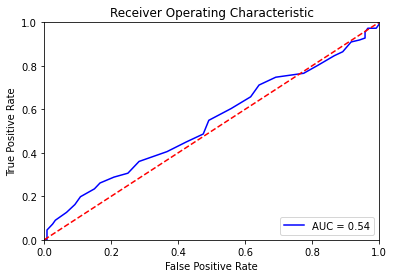

In [69]:
plot_roc(rfc_1, X_test_1, y_test_1)

\textbf{Figura 13: Curva ROC da Random Forest utilizando as características 1}

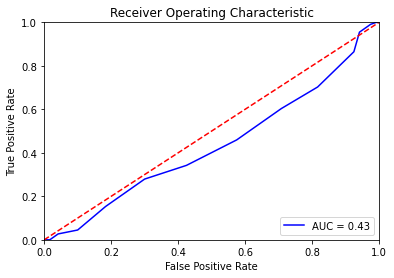

In [16]:
plot_roc(model2, X_test_1, y_test_1)

\textbf{Figura 14: Curva ROC do KNN utilizando as características 1}

O modelo de random forest pode ser utilizado também para avaliação das importância das variáveis, a Figura 15 mostra o gráfico das 50 variáveis com maior importância na classificação.

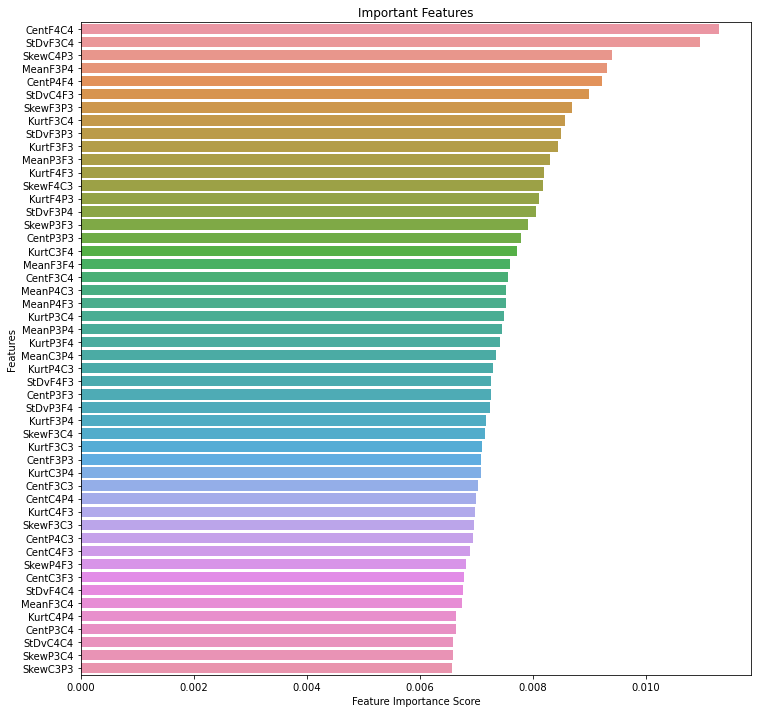

In [21]:
feature_imp_1 = pd.Series(rfc_1.feature_importances_,index=feature_list).sort_values(ascending=False)
feature_imp_1 = feature_imp_1[0:50]
plt.figure(figsize=(12,12))
sns.barplot(x=feature_imp_1, y=feature_imp_1.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features");

\textbf{Figura 15: Importância das variáveis do modelo da random forest das características 1}

## Resultados Característica 2

In [13]:
IC_rfc_2 = bootstrap_auc(rfc_2, X_train_2, y_train_2, X_test_2, y_test_2, 1000)

In [14]:
value_k_2 = 4
model4 = KNeighborsClassifier(n_neighbors=value_k_2+1)
model4.fit(X_train_2,y_train_2)
IC_knn_2 = bootstrap_auc(model4, X_train_2, y_train_2, X_test_2, y_test_2, 1000)

In [22]:
print('Intervalo de Confiança de 95%')
print('Random Forest: ', IC_rfc_2)
print('KNN: ', IC_knn_2)

Intervalo de Confiança de 95%
Random Forest:  [0.3884987  0.54166056]
KNN:  [0.35997569 0.50547566]


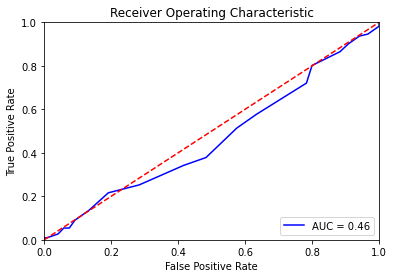

In [17]:
plot_roc(rfc_2, X_test_2, y_test_2)

\textbf{Figura 16: Curva ROC da Random Forest utilizando as características 2}

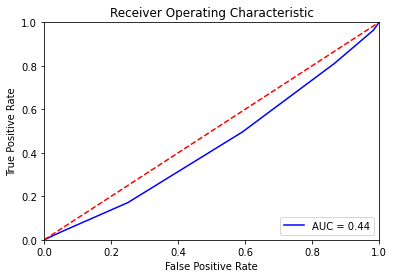

In [18]:
plot_roc(model4, X_test_2, y_test_2)

\textbf{Figura 17: Curva ROC do KNN utilizando as características 2}

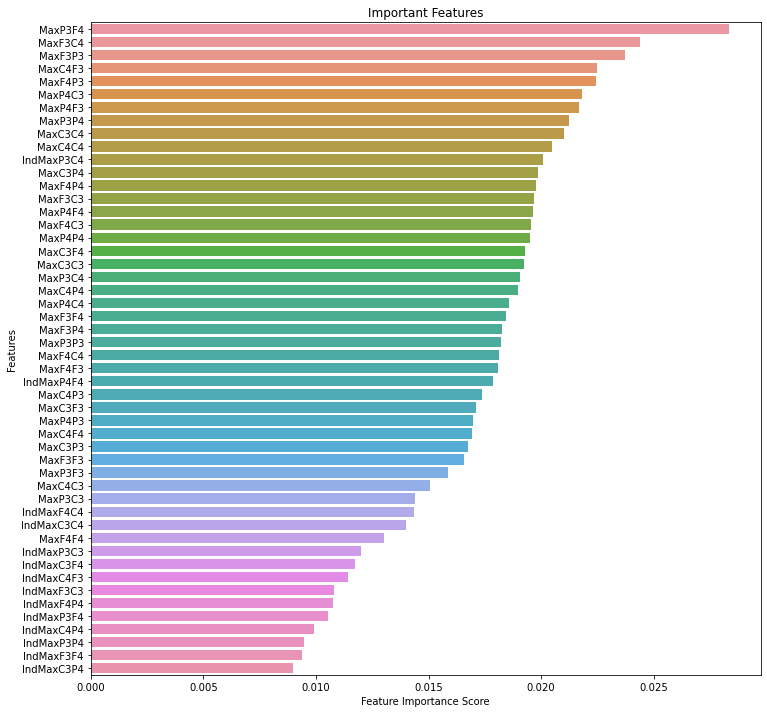

In [25]:
feature_imp_2 = pd.Series(rfc_2.feature_importances_,index=feature_list_2).sort_values(ascending=False)
feature_imp_2 = feature_imp_2[0:50]
plt.figure(figsize=(12,12))
sns.barplot(x=feature_imp_2, y=feature_imp_2.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features");

\textbf{Figura 18: Importância das novas variáveis do modelo da random forest das características 2}

# Discussão

Observando os resultados obtidos utilizando as características 1, o teste estatístico falha ao rejeitar o H0, ou seja, não há diferença entre os dois modelos. E observando o gráfico da Figura 15 de importância de variáveis, não foi possível ver nenhum padrão nos canais ou medidas.
Os resultados obtidos utilizando as características 2, o teste estatístico também falha ao rejeitar o H0. E nesse caso, observando o gráfico da Figura 18 de importância de variáveis, podemos ver que a variável 'valor máximo' parece ser a mais relevante na classificação.

# Conclusão

Ao analisar os resultados não parece haver diferença entre os dois classificadores.
Nesse trabalho, os resultados obtidos dos classificadores, utilizando essas medidas, aparentemente não são muito promissores.
A próxima etapa seria investigar outras medidas/métricas que melhor representem o resultado da técnica de conectividade cerebral, em conjunto com outros classificadores. Assim como a investigação da utilização de técnicas de seleção de canais.

# Referências

[1] LANA, E. P.; ADORNO, B. V.; TIERRA-CRIOLLO, C. J. An ERD/ERS analysis of the relation between human arm and robot manipulator movements. 2013 ISSNIP Biosignals and Biorobotics Conference: Biosignals and Robotics for Better and Safer
Living (BRC). Anais...Rio de Janeiro: IEEE, 2013

[2] BACCALÁ, L. A.; SAMESHIMA, K.; TAKAHASHI, D. Y. Generalized partial directed coherence. 2007 15th International Conference on Digital Signal Processing. Anais...Cardiff: IEEE, 2007